In this project we’re going to perform analysis of Meteorological data. Our goal of this project is to transform the raw data into information and then convert that information into knowledge.

A null hypothesis to be considered is : “Ho : Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming”.

The Ho means we need to find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for the same period have increased or not.

Let us first import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, let’s read our data which is present in the ‘weatherHistory.csv’ file.

In [2]:
data = pd.read_csv('/content/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


It is important to note that our data should not contain any missing value.

In [3]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

As it can clearly be seen that the feature — ‘Precip Type’ has 517 null values. Thankfully this feature is of no use to us, so we can simply drop this feature later. Now, let’s checkout how many rows we have and what are the data types does our features have.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Let's print the names of all the columns:

In [5]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Now, we will select only those columns which are of our use and leave others.

Selected columns are :

'Formatted Date'

'Apparent Temperature (C)'

'Humidity'

'Daily Summary'

In [6]:
col = ['Formatted Date', 'Apparent Temperature (C)', 'Humidity', 'Daily Summary']
data = data[col]
data.head()

,Formatted Date,Apparent Temperature (C),Humidity,Daily Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Partly cloudy throughout the day.


For analysing data further, it is necessary to change the 'Formatted Date' into Date-Time format because the data type of this feature is 'object' and we can't train our model on object data type. It can simply be done by using pandas predefined function -> pd.to_datetime().

Remember to put utc = True.

In [7]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data = data.set_index('Formatted Date')
data = data.resample('M').mean()

<ipython-input-7-434ad848c714>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('M').mean()


Resample('M') simply converting the hourly data to monthly by taking the mean.

This is how our data looks like:

In [8]:
data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


It's time to visualize our data using some outstanding libraries called matplotlib and seaborn.

Firstly, let's have a look at variation of 'Apparent Temprature' and 'Humidity' with time.

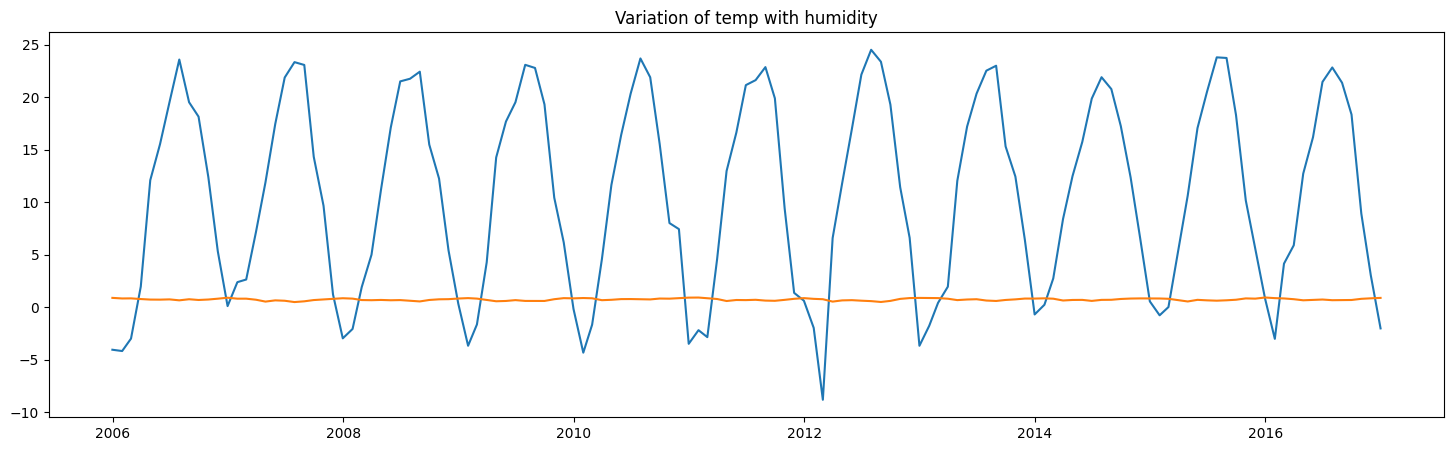

In [9]:
plt.figure(figsize=(18,5))
plt.title('Variation of temp with humidity')
plt.plot(data)

Now, let's plot the graph of temperature with humidity for every even month.

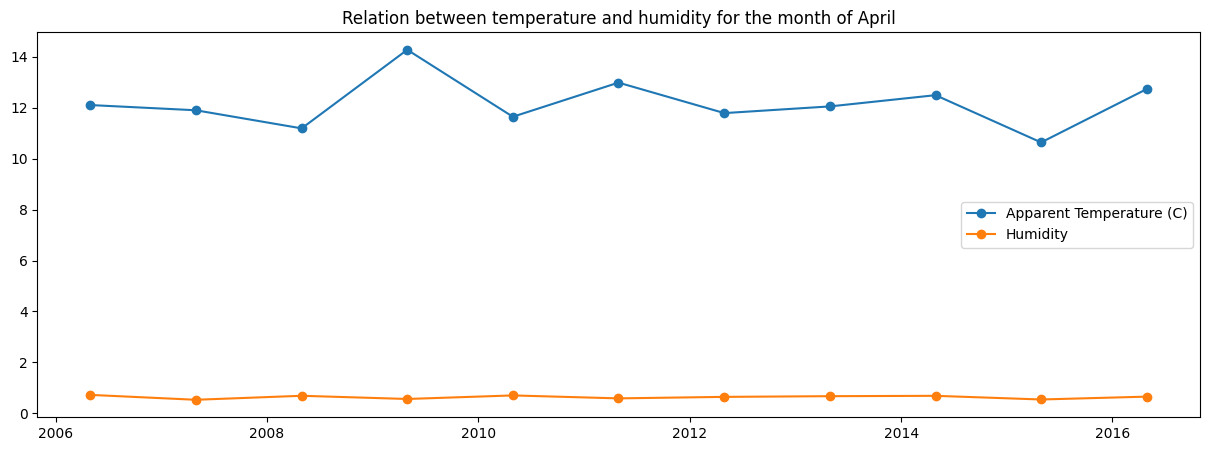

In [10]:
plt.figure(figsize=(15, 5))
data_of_april = data[data.index.month==4]
plt.plot(data_of_april, marker='o',label=['Apparent Temperature (C)','Humidity'] );
plt.legend(loc = 'center right',fontsize = 10)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

From the above graph it is clear that for the year 2009, there is sudden increase in temperature and it is the maximum temperature of April. The temperature again fall after 2009 and in 2015 april reached it's minimum temperature.

Now, let's plot the co-relation between the features our our data. And let's see what we can find out from that.

For this case Heatmap will be of great help from seaborn library.

<Axes: >

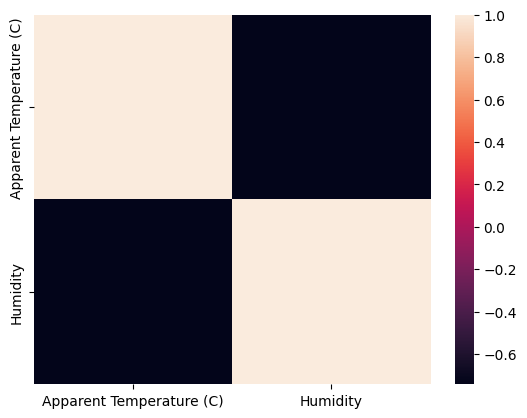

In [11]:
correlation = data.corr()
sns.heatmap(correlation)

This is our beatiful correlation between 'Apparent Temperature' and 'Humidity'.

Now, let's plot bar plot to see relation between 'Humidity' and 'Apparent Temperature'.

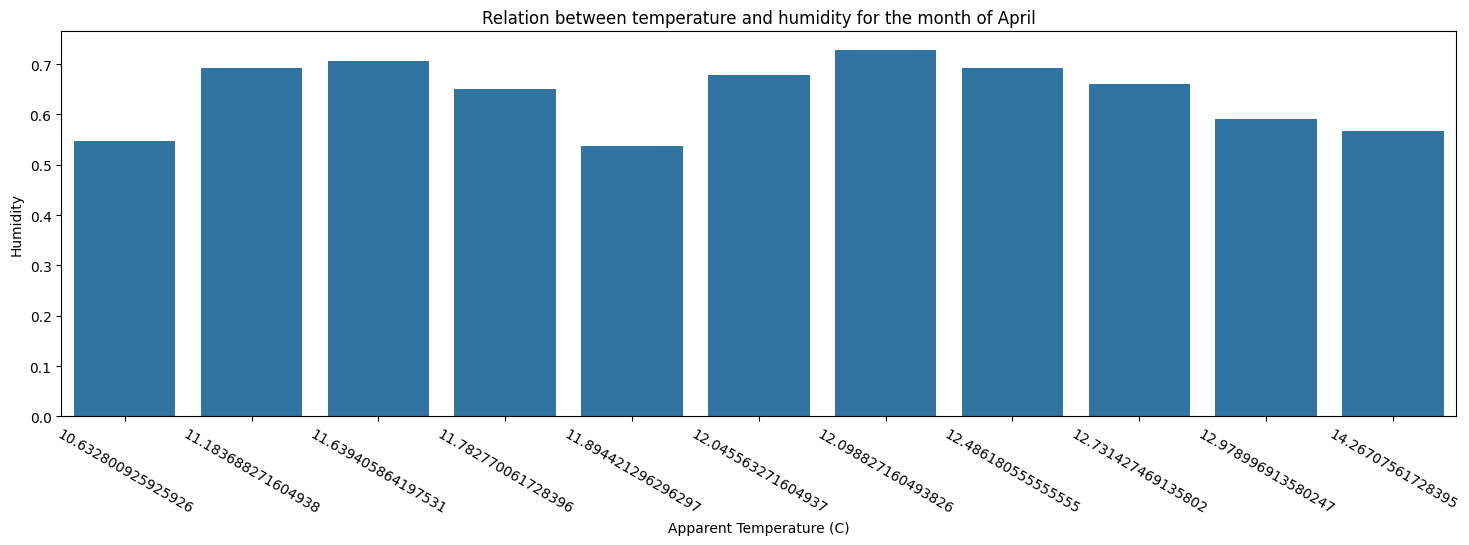

In [12]:
plt.figure(figsize = (18,5))
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=data_of_april)
plt.xticks(rotation=-30)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

| Conclusion

Our environment is highly affected by Global Warming. From our analysis it's been a clear observation that their is sudden increase in temperature and sudden decrease in temperature over ten years. But, in case of humidity, it is seen that it neither rise of fall instead stayed same over 10 years.